In [1]:
import numpy as np
import tensorflow as tf
import os 
import random
from io import BytesIO
import matplotlib.pyplot as plt
from ipywidgets import widgets

In [2]:
TRAIN_DIR = 'horse-or-human'
print(f'the current Directory is:',os.listdir())

print(f'\nSub-folders in {TRAIN_DIR} is:', os.listdir(TRAIN_DIR))

the current Directory is: ['horse-or-human', 'main.ipynb']

Sub-folders in horse-or-human is: ['horses', 'humans']


In [3]:
train_horse_dir = os.path.join(TRAIN_DIR, 'horses')

train_human_dir = os.path.join(TRAIN_DIR, 'humans')

train_horse_names = os.listdir(train_horse_dir)
print('the first 5 name of horse:', train_horse_names[: 5])

train_human_names = os.listdir(train_human_dir)
print('the first 5 name of human:', train_human_names)

the first 5 name of horse: ['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png']
the first 5 name of human: ['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png', 'human01-10.png', 'human01-11.png', 'human01-12.png', 'human01-13.png', 'human01-14.png', 'human01-15.png', 'human01-16.png', 'human01-17.png', 'human01-18.png', 'human01-19.png', 'human01-20.png', 'human01-21.png', 'human01-22.png', 'human01-23.png', 'human01-24.png', 'human01-25.png', 'human01-26.png', 'human01-27.png', 'human01-28.png', 'human01-29.png', 'human01-30.png', 'human02-00.png', 'human02-01.png', 'human02-02.png', 'human02-03.png', 'human02-04.png', 'human02-05.png', 'human02-06.png', 'human02-07.png', 'human02-08.png', 'human02-09.png', 'human02-10.png', 'human02-11.png', 'human02-12.png', 'human02-13.png', 'human02-14.png', 'human02-15.png', 'human02-16.p

In [4]:
print('The total object in the horse folder is:',len(os.listdir(train_horse_dir)))
print('The total object in the humans folder is:',len(os.listdir(train_human_dir)))

The total object in the horse folder is: 500
The total object in the humans folder is: 527


In [6]:
# display some image from the folders later project  

In [5]:
# build a model 

model = tf.keras.Sequential([
    tf.keras.Input(shape=(300, 300, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 78400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    40,141,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,198,145 (153.34 MB)

 Trainable params: 40,198,145 (153.34 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

In [8]:
# Instantiate the dataset

train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR, 
    batch_size = 32,
    image_size = (300, 300),
    label_mode='binary'
)
type_dataset = type(train_dataset)

Found 1027 files belonging to 2 classes.


In [9]:
rescaled_layer = tf.keras.layers.Rescaling(scale=1./255)
#rescale_layer = tf.keras.layers.Rescaling(scale=1./255)

In [10]:
#train_dataset_scaled = train_dataset.map(lambda image, label: (rescaled_layer(image), label))
train_dataset_scaled = train_dataset.map(lambda image, label: (rescaled_layer(image), label))

In [11]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['loss'] <= 0.02:
             print('Loss is low so cancelling training!')
             self.model.stop_training = True


In [16]:
history = model.fit(
    train_dataset_scaled,
    epochs=15,
    verbose = 2,
    callbacks = [myCallback()]
)

Epoch 1/15
33/33 - 106s - 3s/step - accuracy: 0.8783 - loss: 0.3148
Epoch 2/15
33/33 - 99s - 3s/step - accuracy: 0.9367 - loss: 0.2033
Epoch 3/15
33/33 - 103s - 3s/step - accuracy: 0.9854 - loss: 0.0371
Epoch 4/15
33/33 - 102s - 3s/step - accuracy: 0.9757 - loss: 0.1692
Epoch 5/15
33/33 - 113s - 3s/step - accuracy: 0.9834 - loss: 0.0465
Epoch 6/15
33/33 - 100s - 3s/step - accuracy: 0.9815 - loss: 0.0551
Epoch 7/15
33/33 - 113s - 3s/step - accuracy: 0.9542 - loss: 0.3027
Epoch 8/15
Loss is low so cancelling training!
33/33 - 99s - 3s/step - accuracy: 1.0000 - loss: 0.0016


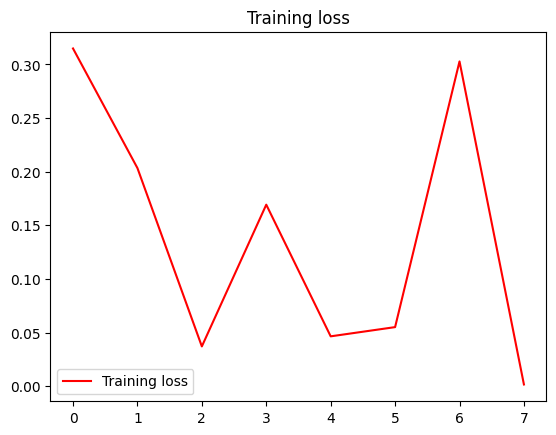

In [18]:
# Plot the training accuracy for each epoch

lss = history.history['loss']

epochs = range(len(lss))

plt.plot(epochs, lss, 'r', label='Training loss')
plt.title('Training loss')
plt.legend(loc=0)
plt.show()

In [12]:
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (train_dataset_scaled
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                      )

In [14]:
history = model.fit(
    train_dataset_final,
    epochs=15,
    verbose = 2,
    #callbacks = [myCallback()]
)

Epoch 1/15


33/33 - 98s - 3s/step - accuracy: 0.6300 - loss: 0.9708
Epoch 2/15
33/33 - 90s - 3s/step - accuracy: 0.8666 - loss: 0.3586
Epoch 3/15
33/33 - 87s - 3s/step - accuracy: 0.9172 - loss: 0.2317
Epoch 4/15
33/33 - 85s - 3s/step - accuracy: 0.9893 - loss: 0.0356
Epoch 5/15
33/33 - 95s - 3s/step - accuracy: 0.9620 - loss: 1.2198
Epoch 6/15
33/33 - 86s - 3s/step - accuracy: 0.9990 - loss: 0.0091
Epoch 7/15
33/33 - 83s - 3s/step - accuracy: 0.9659 - loss: 0.1750
Epoch 8/15
33/33 - 87s - 3s/step - accuracy: 1.0000 - loss: 0.0014
Epoch 9/15
33/33 - 86s - 3s/step - accuracy: 0.9318 - loss: 0.2824
Epoch 10/15
33/33 - 83s - 3s/step - accuracy: 0.9922 - loss: 0.0262
Epoch 11/15
33/33 - 87s - 3s/step - accuracy: 0.9844 - loss: 0.0927
Epoch 12/15
33/33 - 88s - 3s/step - accuracy: 0.9922 - loss: 0.0296
Epoch 13/15
33/33 - 87s - 3s/step - accuracy: 1.0000 - loss: 4.4554e-04
Epoch 14/15
33/33 - 86s - 3s/step - accuracy: 1.0000 - loss: 1.3461e-04
Epoch 15/15
33/33 - 89s - 3s/step - accuracy: 0.9533 - loss:

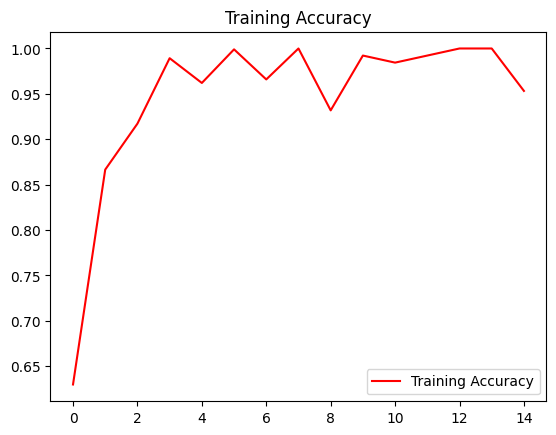

In [15]:
# Plot the training accuracy for each epoch

acc = history.history['accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend(loc=0)
plt.show()

In [18]:
# Create the widget and take care of the display
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(300, 300))
    image = tf.keras.utils.img_to_array(image)
    image = rescaled_layer(image)
    image = np.expand_dims(image, axis=0)
    
    prediction = model.predict(image, verbose=0)[0][0]
    
    with out:
        if prediction > 0.5:
            print(filename + " is a human")
        else:
            print(filename + " is a horse")


def on_upload_change(change):
    """ A function for geting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)
    
    items = change.new
    for item in items: # Loop if there is more than one file uploaded  
        file_jpgdata = BytesIO(item.content)
        file_predict(item.name, file_jpgdata, out)

# Run the interactive widget
# Note: it may take a bit after you select the image to upload and process before you see the output.
uploader.observe(on_upload_change, names='value')

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Output()